<a href="https://colab.research.google.com/github/2303A52486/AIML_2303A52486/blob/main/AIML_Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Breast Cancer using Support Vector Machine Model

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a **non-probabilistic binary linear classifier** (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped ***so that the examples of the separate categories are divided by a clear gap that is as wide as possible***. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall. This gap is also called maximum margin and the SVM classifier is called ***maximum margin clasifier***.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.
![SVM-1](https://github.com/kirankumareranki/AIML-2024/blob/main/Images/SVM-1.png?raw=1)

## Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the Data
We'll use the built in breast cancer dataset from Scikit Learn.
Note the load function:

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

The data set is presented in a dictionary form

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We can grab information and arrays out of this dictionary to create data frame and understand the features

The description of features are as follows




In [6]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Show the feature names

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Set up the DataFrame

In [8]:
df = pd.DataFrame(cancer['data'],
                  columns=cancer['feature_names'])
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

**Is there any missing data?**

In [ ]:
# Sum of the count of null objects in all
# columns of data frame
np.sum(pd.isnull(df).sum())

0

**What does the 'target' data tell from the data set?**

In [ ]:
cancer['target'].shape ## where 1- Benign, 0-Malignent

(569,)

**Adding the target data to the DataFrame**

In [9]:
df['Cancer'] = pd.DataFrame(cancer['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploratory Data Analysis


### Check the relative counts of benign (0) <br> vs malignant (1)
### cases of cancer

In [10]:
l =len(df.columns)
l

31

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


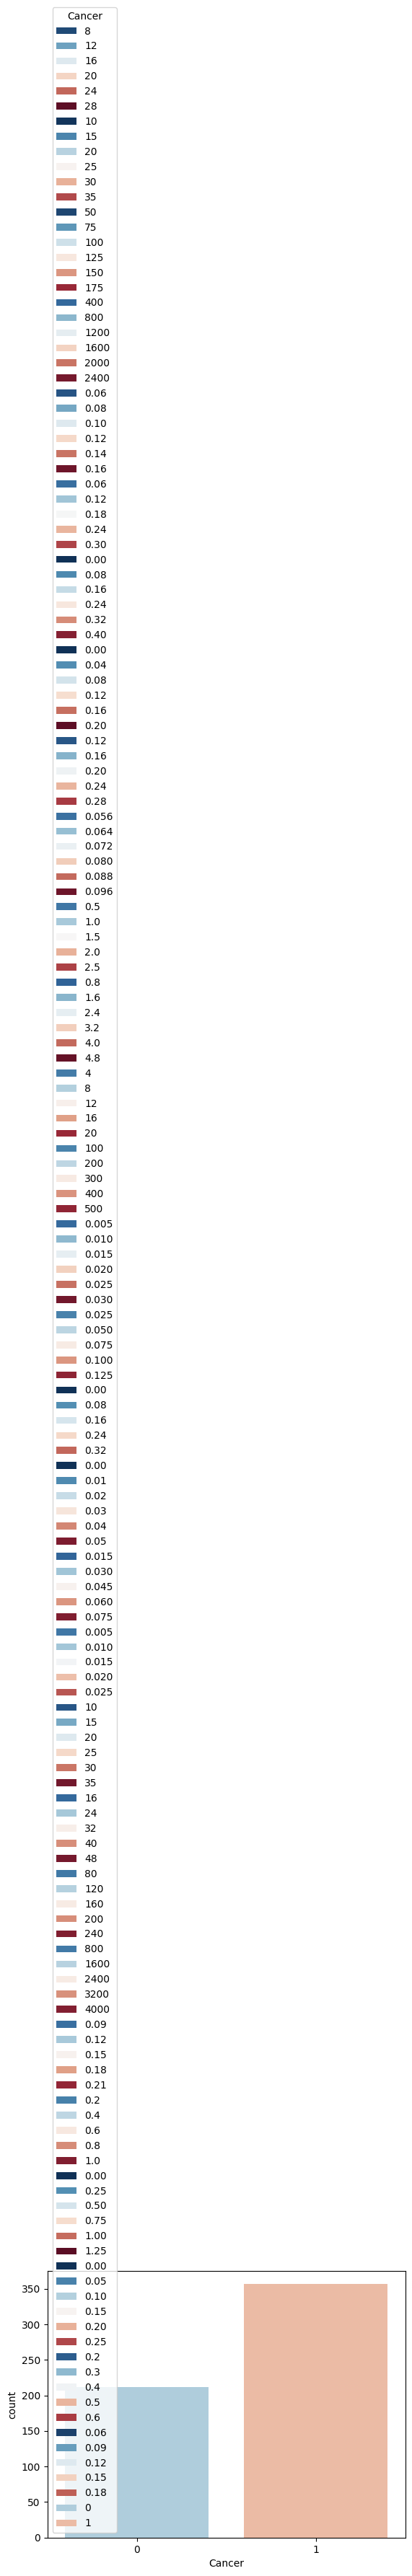

In [11]:
l =len(df.columns)
for i in range(l):
  #sns.set_style('whitegrid')
  sns.countplot(x='Cancer',hue=df.columns[i],data=df,
              palette='RdBu_r',)

**Draw boxplots of all the mean features <br> (first 10 columns) for '0' and '1' CANCER OUTCOME**

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


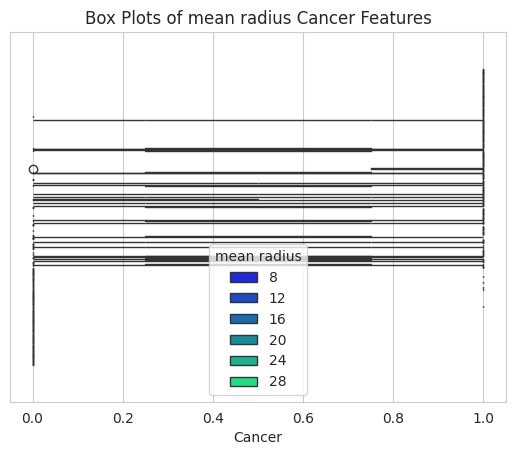

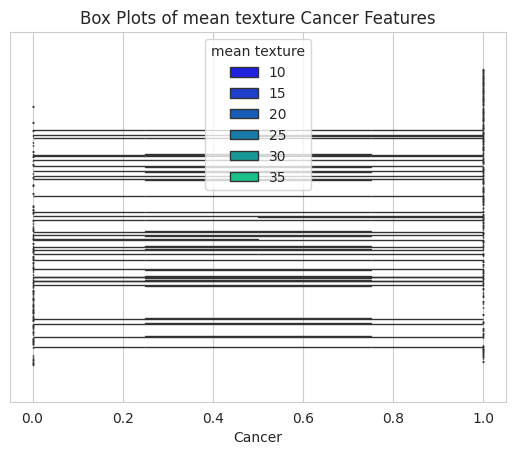

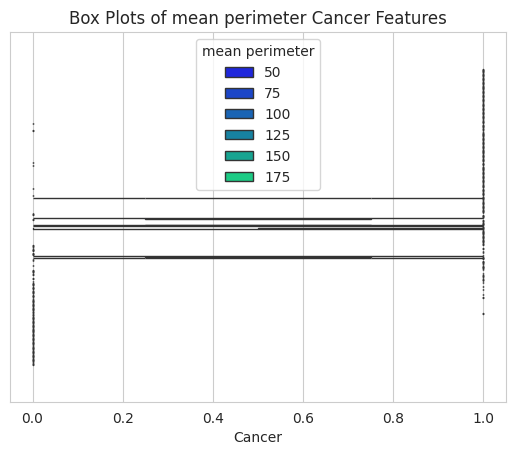

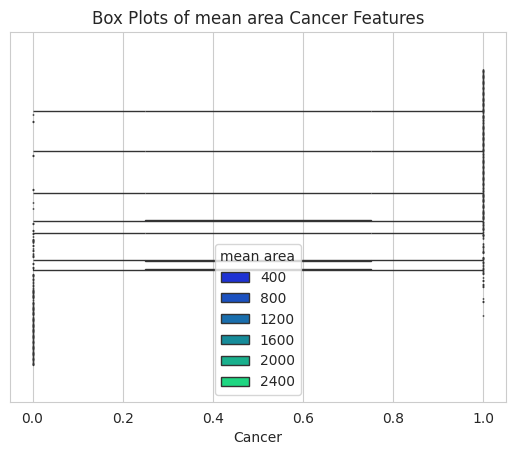

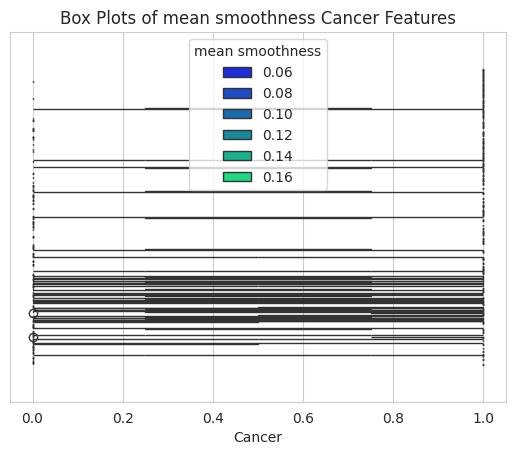

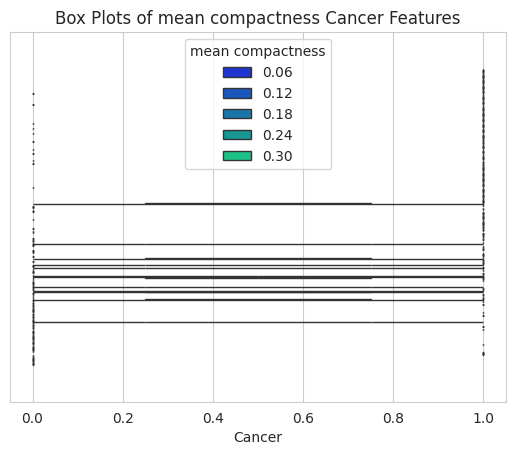

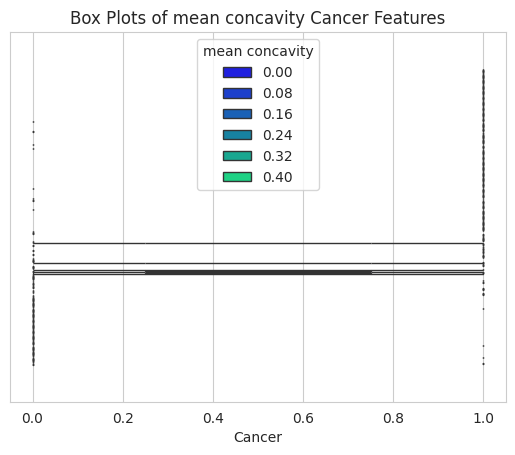

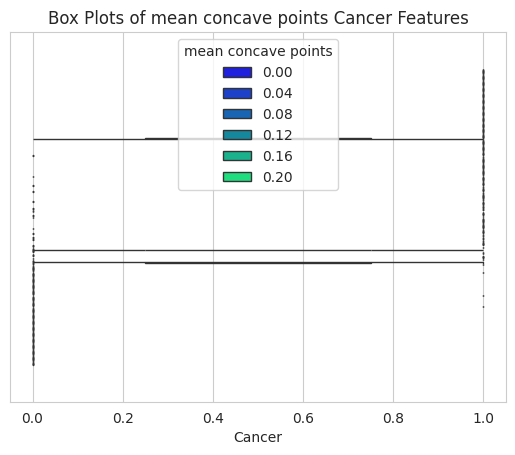

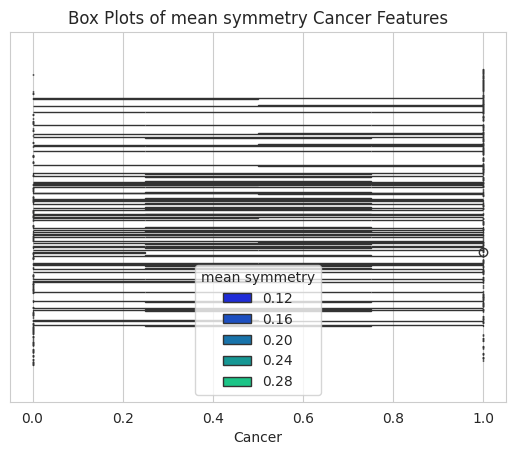

<Figure size 640x480 with 0 Axes>

In [ ]:
l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Cancer',hue=l[i], data=df,
                palette='winter')
    plt.title(f"Box Plots of {l[i]} Cancer Features")
    plt.figure()

### Not all the features seperate out the cancer predictions <br> equally clearly
**For example, from the following two plots it is clear that smaller <br> area generally is indicative of positive cancer detection, <br>while nothing concrete can be said from the plot of mean smoothness**

Text(0.5, 1.0, 'Cancer Feature mean smoothness')

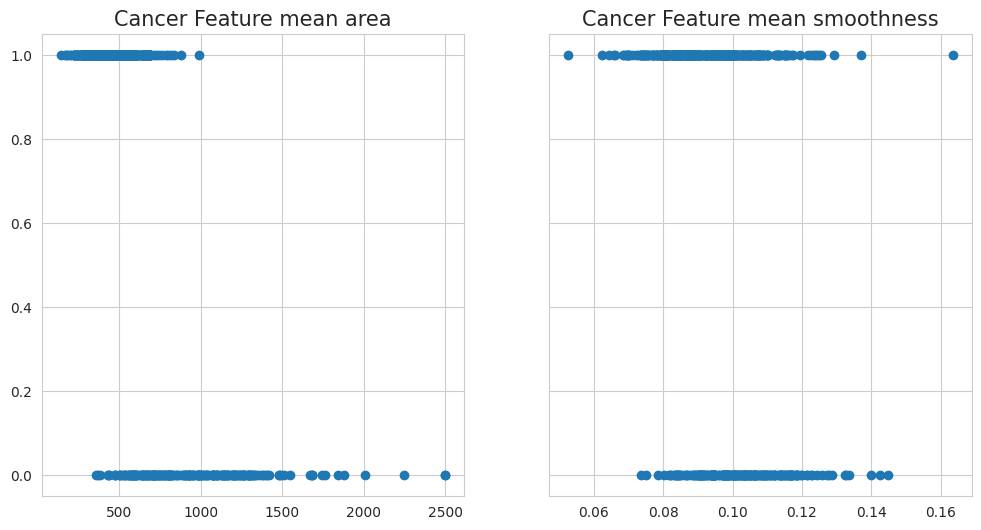

In [ ]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['mean area'],df['Cancer'])
ax1.set_title("Cancer Feature mean area", fontsize=15)
ax2.scatter(df['mean smoothness'],df['Cancer'])
ax2.set_title("Cancer Feature mean smoothness",fontsize=15)

## Training and prediction

### Train Test Split

In [ ]:
# Define a dataframe with only features
df_feat = df.drop('Cancer',axis=1)
#df_feat.head()
df_feat.shape

(569, 30)

In [ ]:
# Define a dataframe with only target results for
# cancer detection
df_target = df['Cancer']
#df_target.head()
df_target.shape

(569,)

In [14]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =
train_test_split(df_feat, df_target,test_size=0.20,
                 random_state=101)

In [ ]:
df_feat.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 30), (455, 30), (114, 30), (455,), (114,))

### Train the Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

### Predictions and Evaluations

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

**Notice that we are classifying everything into a single class!<br> This means our model needs to have it parameters adjusted <br> (it may also help to normalize the data)**

In [ ]:
print(confusion_matrix(y_test,predictions))

[[36  6]
 [ 0 72]]


**As expected, the classification report card is bad**

In [ ]:
accuracy_score(y_test, predictions)

0.9473684210526315

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print("Test Data Misclassification error rate:",
      round(np.mean(predictions!=y_test),3))

train_pred = model.predict(X_train)
print("Train Data Misclassification error rate:",
      round(np.mean(train_pred!=y_train),3))
print(f"Accuracy of train data:{accuracy_score(y_train, train_pred)}")
print(f"Accuracy of test data:{accuracy_score(y_test, predictions)}")

Test Data Misclassification error rate: 0.053
Train Data Misclassification error rate: 0.09
Accuracy of train data:0.9098901098901099
Accuracy of test data:0.9473684210526315


## Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, Scikit-learn has the functionality of trying a bunch of combinations and see what works best, built in with GridSearchCV! The CV stands for cross-validation.

**GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.**

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [ ]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

**You can inspect the best parameters found by GridSearchCV in the best\_params\_ attribute, and the best estimator in the best\_estimator\_ attribute**

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

**Then you can re-run predictions on this grid object just like you would with a normal model**

In [ ]:
grid_predictions = grid.predict(X_test)

**Now print the confusion matrix to see improved predictions**

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


**Classification report shows improved F1-score**

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



### Another set of parameters for GridSearch

In [ ]:
param_grid = {'C': [50,75,100,125,150], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(tol=1e-5),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))